In [26]:
import pandas as pd

In [27]:
#import cleaned versions of files

# orderlines_cl.csv
url = 'https://drive.google.com/file/d/1lrSr_vVbXN7QSVSScf68DpWwvCMclK5m/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orderlines = pd.read_csv(path)

# orders_cl.csv
url = 'https://drive.google.com/file/d/1cGjJ9o3vtwjK0Sohyr3YVTccXfnTPijT/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orders = pd.read_csv(path)

# brands_cl.csv
url = 'https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
brands = pd.read_csv(path)

# products_cl.csv
url = 'https://drive.google.com/file/d/1rHC8M-HG13FtVncImXBydgDtIHyCPH0g/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
products = pd.read_csv(path)

In [28]:
# do not display the number with scientific notation
pd.options.display.float_format = '{:.2f}'.format

pd.set_option('display.max_rows', 1000)
pd.set_option("display.max_colwidth", 100)

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines['date'] = pd.to_datetime(orderlines['date'])

In [31]:
Q1_r=orderlines.total_price.quantile(0.25)#Q1 of revenue
Q3_r=orderlines.total_price.quantile(0.75) #Q3 of revenue
IQR_r=Q3_r-Q1_r

                                                          
orderlines2 =orderlines.loc[(orderlines['total_price'] >= (Q1_r - 1.5*IQR_r))&(orderlines['total_price'] <= (Q3_r + 1.5*IQR_r))]

In [32]:
# old: discount_rami
discount_agg_year_month_sum = (
orderlines2
    .filter(["id_order","sku","unit_price", 'date', 'total_price'])
    .merge(products.filter(["sku","desc","max_price_orderlines"]), on="sku", how="left")
    .assign(disc = lambda x: x["max_price_orderlines"] - x["unit_price"])
    .assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["max_price_orderlines"])) * 100 )
    .assign(year_month=orderlines.date.dt.strftime('%Y-%m'))
    .dropna()
    .groupby(['year_month', 'unit_price', 'disc', 'disc_perc'])
    .agg({'total_price':'sum'})
    .reset_index()
) 
discount_agg_year_month_sum

,year_month,unit_price,disc,disc_perc,total_price
0,2017-01,4.99,0.00,0.00,14.97
1,2017-01,5.49,0.00,0.00,170.19
2,2017-01,6.36,0.00,0.00,25.44
3,2017-01,6.49,3.50,35.04,38.94
4,2017-01,6.49,4.51,41.00,6.49
...,...,...,...,...,...
1225,2018-01,418.59,9.99,2.33,418.59
1226,2018-01,701.65,147.35,17.36,701.65
1227,2018-01,734.00,146.33,16.62,5872.00
1228,2018-01,822.99,0.00,0.00,822.99


In [33]:
# old: discount_rami_3

discount_agg_year_month_mean = (
orderlines2
    .filter(["id_order","sku","unit_price", 'date', 'total_price'])
    .merge(products.filter(["sku","desc","max_price_orderlines"]), on="sku", how="left")
    .assign(disc = lambda x: x["max_price_orderlines"] - x["unit_price"])
    .assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["max_price_orderlines"])) * 100 )
    .assign(year_month=orderlines.date.dt.strftime('%Y-%m'))
    .dropna()
    .groupby(['year_month', 'unit_price', 'disc', 'disc_perc'])
    .agg({'total_price':'mean'})
    .reset_index()
) 

discount_agg_year_month_mean

,year_month,unit_price,disc,disc_perc,total_price
0,2017-01,4.99,0.00,0.00,4.99
1,2017-01,5.49,0.00,0.00,85.10
2,2017-01,6.36,0.00,0.00,6.36
3,2017-01,6.49,3.50,35.04,12.98
4,2017-01,6.49,4.51,41.00,6.49
...,...,...,...,...,...
1225,2018-01,418.59,9.99,2.33,418.59
1226,2018-01,701.65,147.35,17.36,701.65
1227,2018-01,734.00,146.33,16.62,734.00
1228,2018-01,822.99,0.00,0.00,822.99


In [34]:
# old: discount_rami_4

discount_no_agg = (
orderlines2
    .filter(["id_order","sku","unit_price", 'date', 'total_price'])
    .merge(products.filter(["sku","desc","max_price_orderlines"]), on="sku", how="left")
    .assign(disc = lambda x: x["max_price_orderlines"] - x["unit_price"])
    .assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["max_price_orderlines"])) * 100 )
    .assign(year_month=orderlines.date.dt.strftime('%Y-%m'))
    .dropna()
    .reset_index()
) 

discount_no_agg

,index,id_order,sku,unit_price,date,total_price,desc,max_price_orderlines,disc,disc_perc,year_month
0,34,299576,SAM0095,82.64,2017-01-01 06:51:23,82.64,SSD Hard Drive SATA 6 Gb / s 25-inch NAND technology for Mac and PC.,86.99,4.35,5.00,2017-01
1,150,299695,PAC1400,90.99,2017-01-01 13:27:15,90.99,Control on / off and power / consumer remote sensor for iPad iPhone iPod Touch and Apple Watch,96.99,6.00,6.19,2017-01
2,293,299860,PAC1516,457.89,2017-01-01 18:40:38,457.89,NAS server with 8GB of RAM memory 2 Gigabit ports and advanced tools for Mac and PC,484.99,27.10,5.59,2017-01
3,316,299881,SAN0137,49.39,2017-01-01 19:13:45,49.39,SSD 120GB 25 inches,63.58,14.19,22.32,2017-01
4,332,299902,IOT0018,23.74,2017-01-01 19:32:46,23.74,Magnetic car holder compatible with all models of iPhone,24.99,1.25,5.00,2017-01
...,...,...,...,...,...,...,...,...,...,...,...
5424,249218,527147,SEV0024,59.99,2018-03-14 12:05:02,59.99,installation RAM HDD + SSD + on your Mac mini + Data Transfer.,59.99,0.00,0.00,2018-01
5425,249250,527170,SEV0024,59.99,2018-03-14 12:16:05,59.99,installation RAM HDD + SSD + on your Mac mini + Data Transfer.,59.99,0.00,0.00,2018-01
5426,249265,527191,FIB0007,99.99,2018-03-14 12:19:19,99.99,Fibaro Monoxide Detector Sensor HomeKit for iPhone and iPad,99.99,0.00,0.00,2018-01
5427,249456,527367,REP0250,69.90,2018-03-14 13:39:34,69.90,Repair service including parts and labor for iPhone 6,69.90,0.00,0.00,2018-01


In [35]:
# define filter to make discount categories: 
def filter(x):
    if x == 0: 
      return "no discount"
    if (x > 0 and x <= 20):
        return '<=20%'
    if (x > 20 and x <= 40):
        return '21% - 40%'
    if (x > 40 and x <= 60):
        return '41% - 60%'
    if (x > 60 and x <= 80):
      return '61% - 80%'
    if(x > 80 and x <= 100):
      return '81% - 100%'

# apply the categories on the generated discount datasets: 

discount_agg_year_month_sum['discount_category'] = discount_agg_year_month_sum['disc_perc'].apply(filter).sort_values()
discount_agg_year_month_mean['discount_category'] = discount_agg_year_month_mean['disc_perc'].apply(filter).sort_values()
discount_no_agg['discount_category'] = discount_no_agg['disc_perc'].apply(filter).sort_values()
discount_agg_year_month_mean.rename(columns={
    'total_price': 'average_price'},
    inplace=True)

discount_agg_year_month_mean

,year_month,unit_price,disc,disc_perc,average_price,discount_category
0,2017-01,4.99,0.00,0.00,4.99,no discount
1,2017-01,5.49,0.00,0.00,85.10,no discount
2,2017-01,6.36,0.00,0.00,6.36,no discount
3,2017-01,6.49,3.50,35.04,12.98,21% - 40%
4,2017-01,6.49,4.51,41.00,6.49,41% - 60%
...,...,...,...,...,...,...
1225,2018-01,418.59,9.99,2.33,418.59,<=20%
1226,2018-01,701.65,147.35,17.36,701.65,<=20%
1227,2018-01,734.00,146.33,16.62,734.00,<=20%
1228,2018-01,822.99,0.00,0.00,822.99,no discount


In [36]:
# check if there are any orders within discount category 61 - 80 %
discount_agg_year_month_sum.loc[discount_agg_year_month_sum['discount_category'] == '61% - 80%', :]

,year_month,unit_price,disc,disc_perc,total_price,discount_category


<AxesSubplot:xlabel='discount_category', ylabel='total_price'>

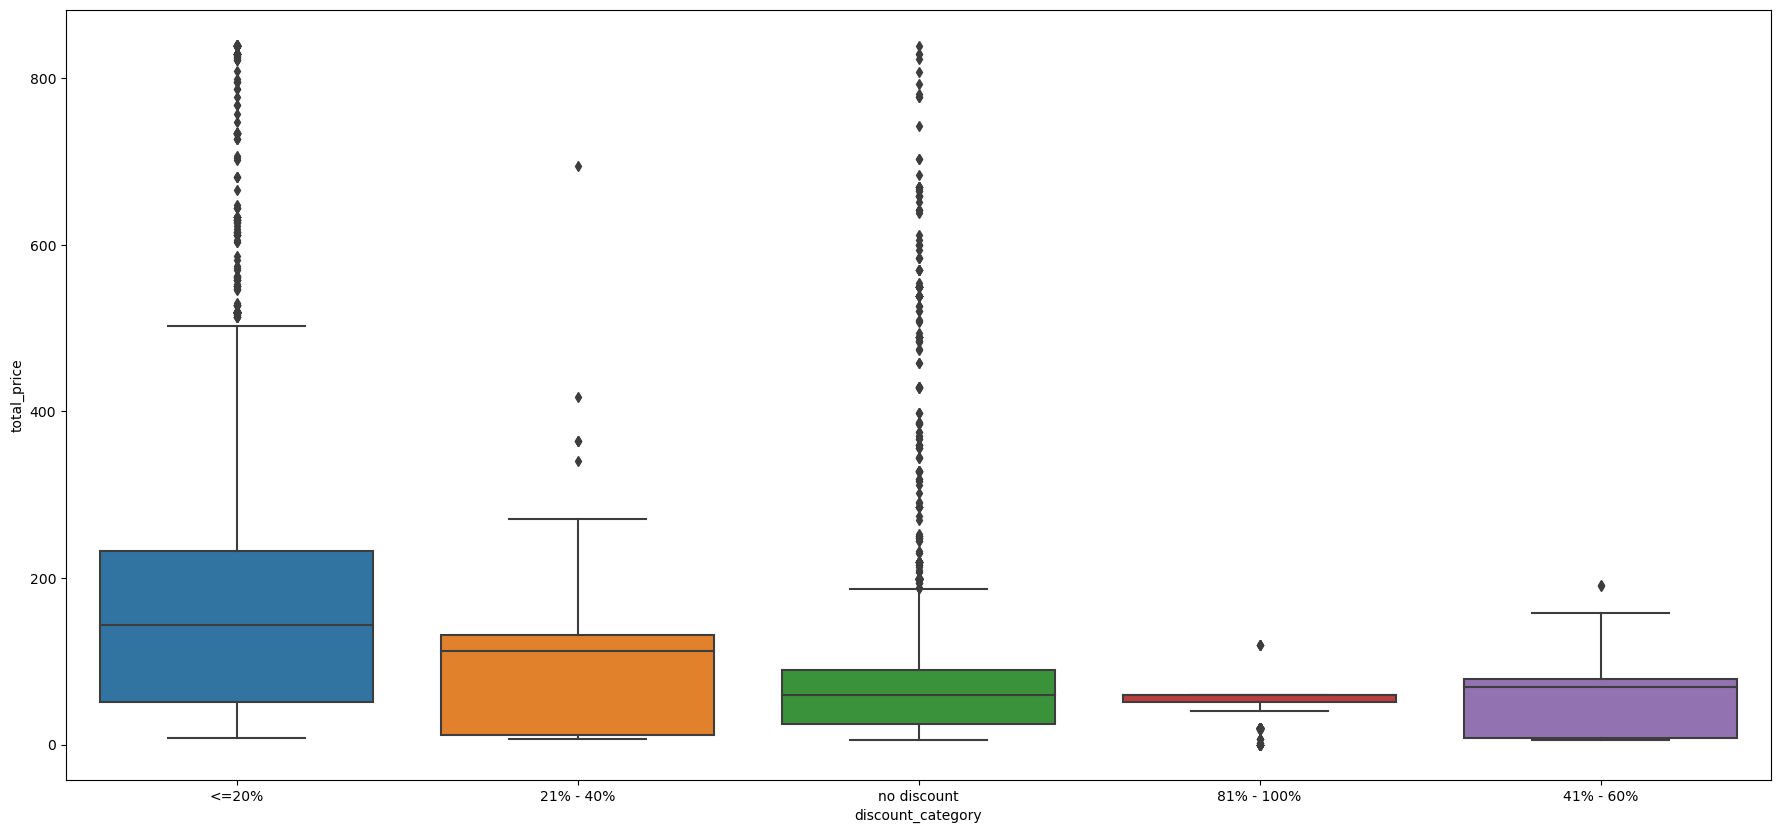

In [38]:
plt.subplots(figsize=(22, 10))
sns.boxplot(x= 'discount_category', y = 'total_price', data=discount_no_agg)

(0.0, 400.0)

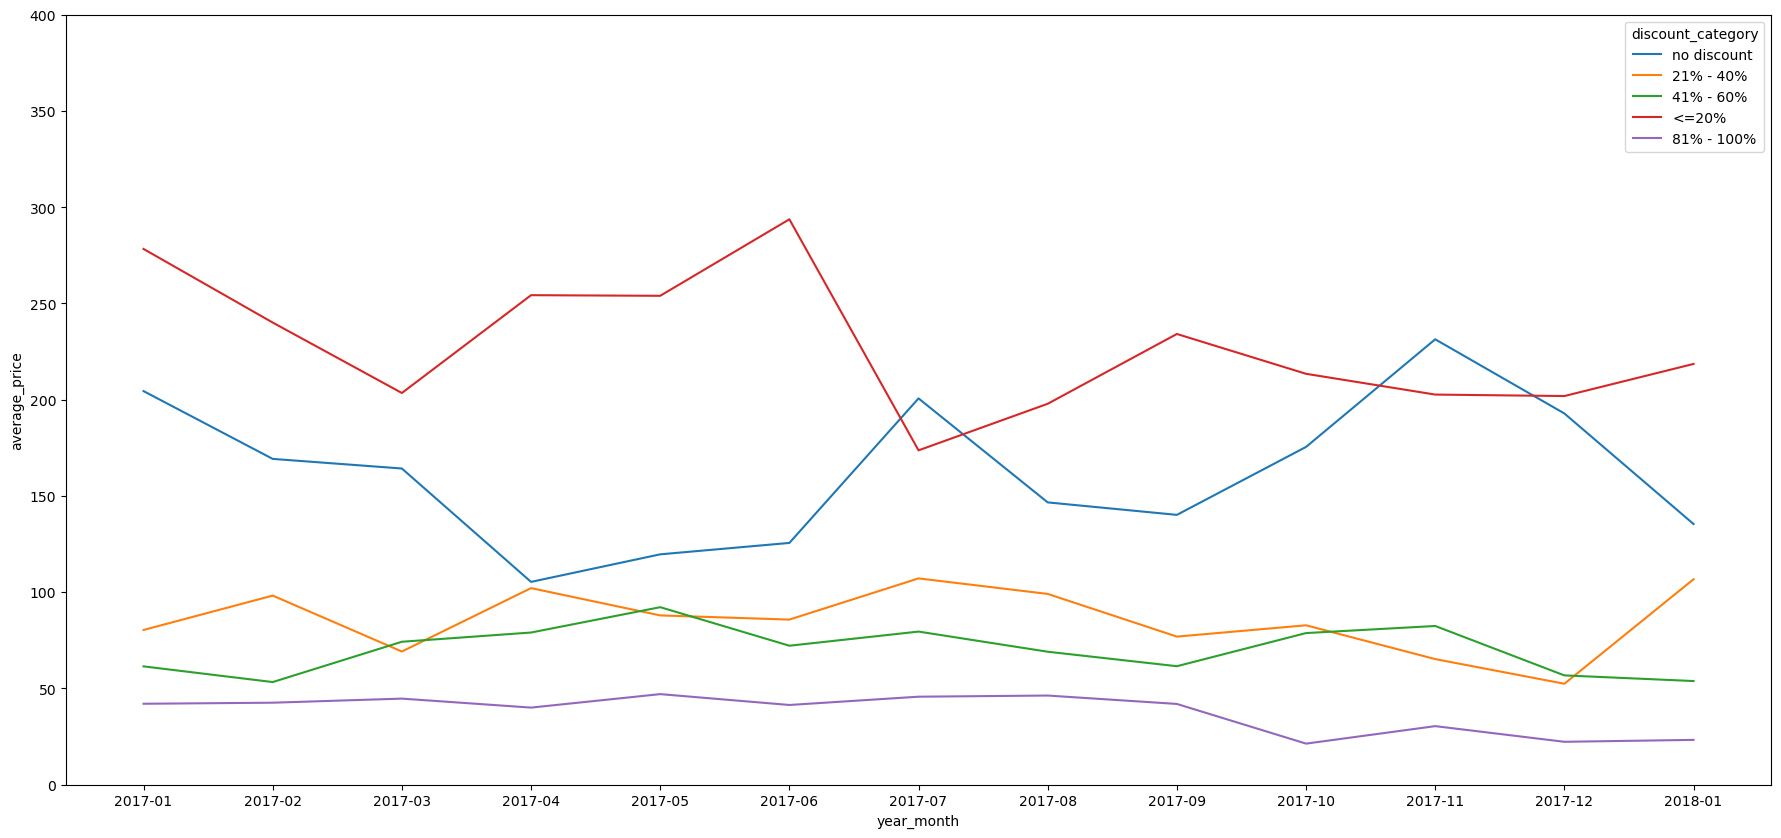

In [39]:
plt.subplots(figsize=(22, 10))
sns.lineplot(x= 'year_month', y = 'average_price', hue='discount_category', ci=None, data=discount_agg_year_month_mean)
plt.ylim(0, 400)

<AxesSubplot:xlabel='year_month', ylabel='disc_perc'>

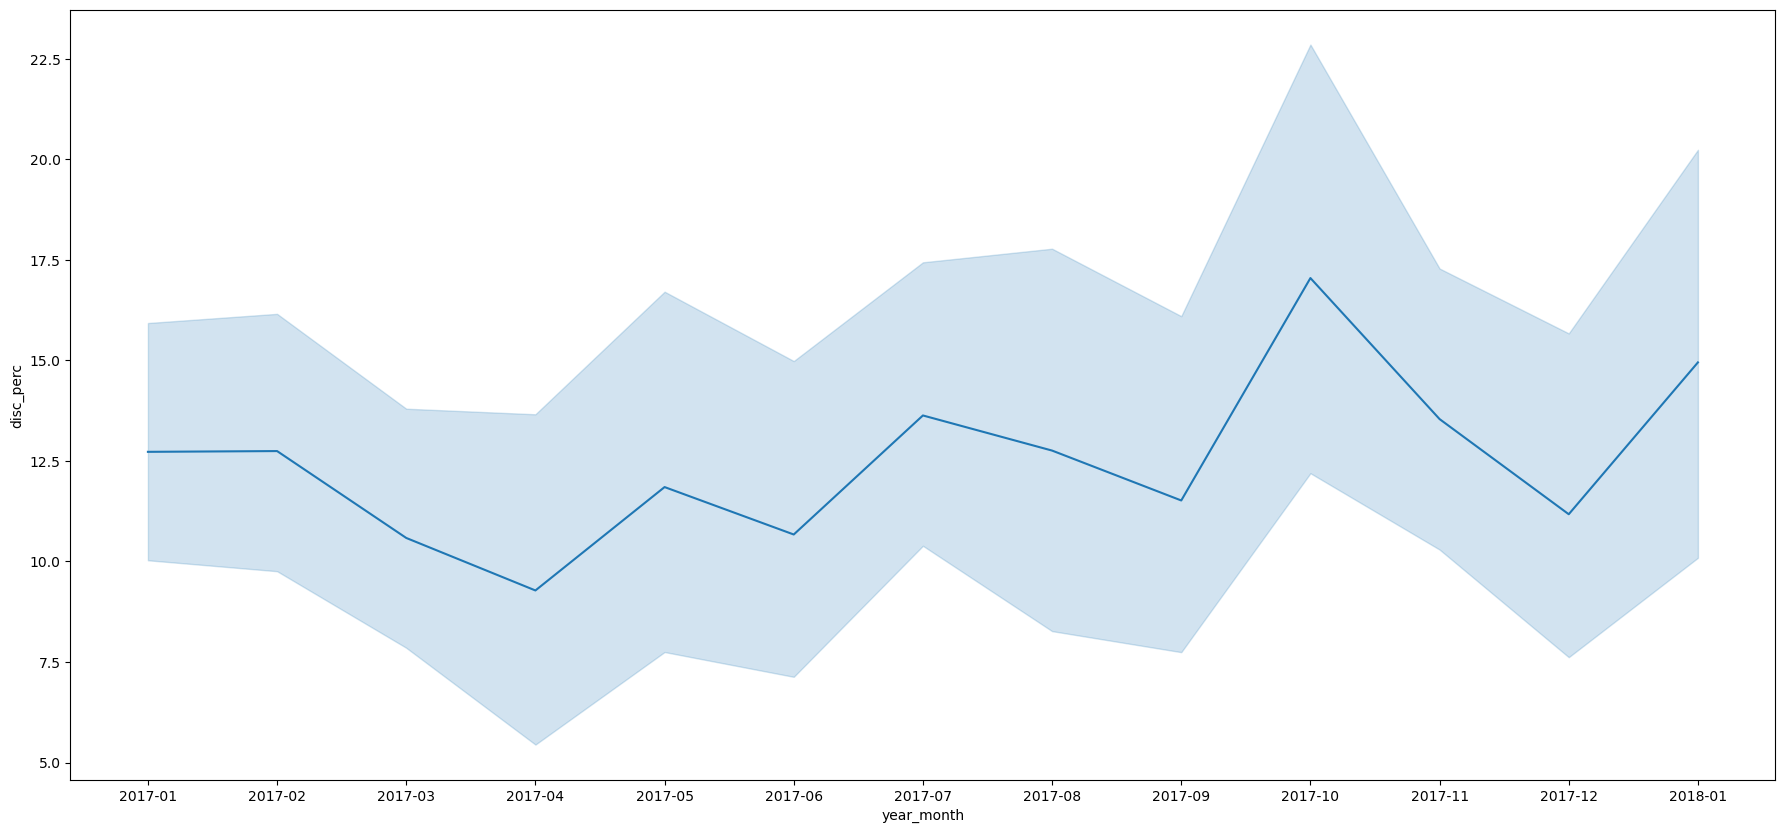

In [40]:
plt.subplots(figsize=(22, 10))
sns.lineplot(x= 'year_month', y = 'disc_perc', data=discount_agg_year_month_sum)

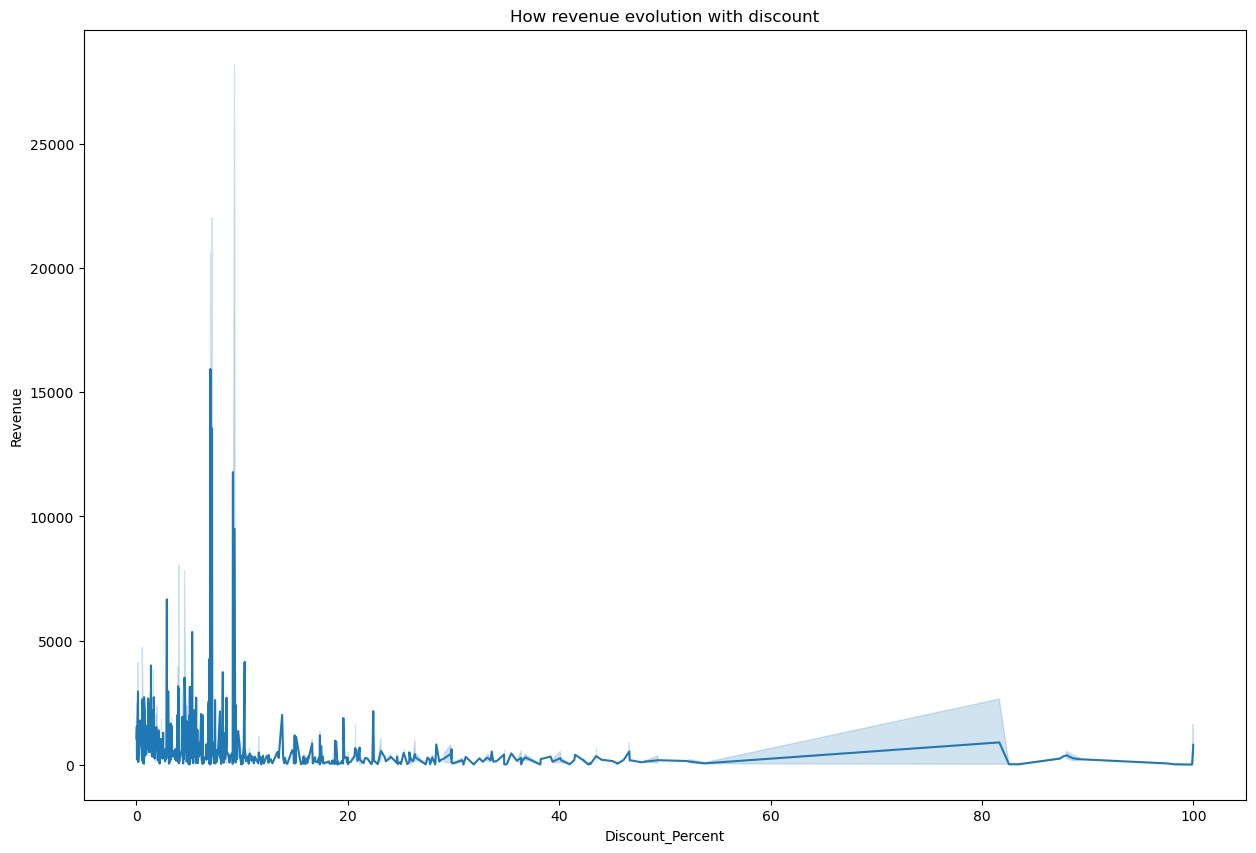

In [41]:
disc_df=(
orderlines
    .filter(["id_order","sku","unit_price",'product_quantity'])
    .merge(products.filter(["sku","desc","max_price_orderlines"]), on="sku", how="left")
    .assign(disc = lambda x: x["max_price_orderlines"] - x["unit_price"])
    .assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["max_price_orderlines"])) * 100 )
    .merge(orders.filter(['order_id','total_paid']), how='left',left_on='id_order',right_on='order_id')
    .dropna()
)
#disc_df.head()
plt.subplots(figsize=(15, 10))

p=sns.lineplot(x='disc_perc', y='total_paid',data=disc_df)
plt.xlabel('Discount_Percent') 
plt.ylabel('Revenue') 
plt.title('How revenue evolution with discount') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()

In [ ]:
dis

In [42]:
#Rene #code and plot of top 5 categories based on mean
orders_month_top5_mean = (orderlines
                      .filter(["id_order","sku","unit_price", 'total_price', 'product_quantity'])
                      .merge(products.filter(["sku","desc","max_price_orderlines", "category", 'total_price']), on="sku", how="left")
                      .assign(year_month = orderlines.date.dt.strftime('%Y-%m'))
                      .query('category==["MacBook", "other", "Mobile Phone", "Ipad", "External Memory"]')
                      .groupby(['year_month', 'category'])
                      .agg({'total_price':'mean', 'product_quantity':'count'})
                      .dropna()
                      .reset_index()
                      .rename(columns={'total_price':'average_price'}, inplace=True)
)
orders_month_top5.head(10)

UndefinedVariableError: name 'category' is not defined

In [ ]:
plt.subplots(figsize=(12, 8))
sns.lineplot(x= 'year_month', y = 'total_price', data=orders_month_top5, hue='category')

In [ ]:
orders_top5_groupsize = (orderlines
                      .filter(["id_order","sku","unit_price", 'total_price', 'product_quantity'])
                      .merge(products.filter(["sku","desc","max_price_orderlines", "category", 'total_price']), on="sku", how="left")
                      .assign(year_month = orderlines.date.dt.strftime('%Y-%m'))
                      .query('category==["MacBook", "other", "Mobile Phone", "Ipad", "External Memory"]')
                      .groupby(['year_month', 'category'])
                      .agg({'total_price':'sum', 'id_order':'count'})
                      .dropna()
                      .reset_index()
                      .assign(revenue_groupsize = lambda x: x["total_price"] / x["id_order"])
                      )

In [ ]:
plt.subplots(figsize=(12, 8))
sns.lineplot(x= 'year_month', y = 'revenue_groupsize', data=orders_top5_groupsize, hue='category')

In [43]:
discount_rami_2.groupby('discount_status')['sku'].count()

KeyError: 'discount_status'

In [ ]:
discount_rami_2.groupby()

In [ ]:
discount_rami['disc_perc']

In [ ]:
#Rene #Laura #defining what products go into the categories
products = products.assign(category ="other")
products.loc[products['name'].str.contains('ipod', regex=True, case=False), "category"] = "ipod"
products.loc[products['name'].str.contains('Hard Drive', regex=True, case=False), "category"] = "External Memory"
products.loc[products['name'].str.contains('MacBoook', regex=True, case=False), "category"] = "MacBook"
products.loc[products['name'].str.contains('iMac', regex=True, case=False), "category"] = "Desktop"
products.loc[products['name'].str.contains('Desktop', regex=True, case=False), "category"] = "Desktop"
products.loc[products['name'].str.contains('Iphone', regex=True, case=False), "category"] = "Mobile Phone"
products.loc[products['name'].str.contains('USB', regex=True, case=False), "category"] = "External Memory"
products.loc[products['name'].str.contains('Case', regex=True, case=False), "category"] = "Mobile Phone Accesories"
products.loc[products['name'].str.contains('Cable', regex=True, case=False), "category"] = "Cable Accesories"
products.loc[products['name'].str.contains('Adapter', regex=True, case=False), "category"] = "Accesories"
products.loc[products['name'].str.contains('Router', regex=True, case=False), "category"] = "WLAN"
products.loc[products['name'].str.contains('Memory', regex=True, case=False), "category"] = "External Memory"
products.loc[products['name'].str.contains('Ipad', regex=True, case=False), "category"] = "Ipad"
products.loc[products['name'].str.contains('Monitor', regex=True, case=False), "category"] = "Monitors"
products.loc[products['name'].str.contains('Core i7', regex=True, case=False), "category"] = "MacBook"
products.loc[products['name'].str.contains('Core i5', regex=True, case=False), "category"] = "MacBook"
products.loc[products['name'].str.contains('UBS Battery', regex=True, case=False), "category"] = "Accesories"
products.loc[products['name'].str.contains('USB-C', regex=True, case=False), "category"] = "Accesories"
products.loc[products['name'].str.contains('monitor activity', regex=True, case=False), "category"] = "Accesories"
products.loc[products['name'].str.contains('Server', regex=True, case=False), "category"] = "Server"
products.loc[products['name'].str.contains('Synology', regex=True, case=False), "category"] = "Server"
products.loc[products['name'].str.contains('games', regex=True, case=False), "category"] = "Accesories"
products.loc[products['name'].str.contains('HDMI', regex=True, case=False), "category"] = "Accesories"
products.loc[products['name'].str.contains('RAM expansion', regex=True, case=False), "category"] = "External Memory"

In [44]:
#do not delete
products_top = (
orderlines2
    .filter(["id_order","sku","unit_price", 'date', 'total_price'])
    .merge(products.filter(["sku",'name',"desc","max_price_orderlines", 'category']), on="sku", how="left")
    .assign(disc = lambda x: x["max_price_orderlines"] - x["unit_price"])
    .assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["max_price_orderlines"])) * 100 )
    .assign(year_month=orderlines.date.dt.strftime('%Y-%m'))
    .dropna()
    .groupby(['year_month', 'sku', 'name', 'desc', 'disc'])
    .agg({'total_price':'sum'})
    .sort_values(by='total_price', ascending = False)
    .reset_index()
) 
products_top['discount_status'] = products_top.apply(lambda row: False if row['disc'] == 0 else True, axis = 1)
products_top.head(100)

,year_month,sku,name,desc,disc,total_price,discount_status
0,2017-02,APP1748,Apple iPad Air 2 Wi-Fi 32GB Space Gray,New iPad Air 2 Wi-Fi 32GB (MNV22TY / A).,17.01,9063.78,True
1,2018-01,APP1986,Apple iPhone 7 (PRODUCT) Red 128GB,New iPhone 7 Special Edition red 128GB Free,51.33,8290.00,True
2,2017-12,APP2493,Apple TV 32GB 4K,Apple multimedia player with 4K resolution and 32GB,8.00,8213.00,True
3,2017-01,APP1748,Apple iPad Air 2 Wi-Fi 32GB Space Gray,New iPad Air 2 Wi-Fi 32GB (MNV22TY / A).,16.01,7433.82,True
4,2017-11,APP2493,Apple TV 32GB 4K,Apple multimedia player with 4K resolution and 32GB,0.00,7363.00,False
5,2017-11,APP1986,Apple iPhone 7 (PRODUCT) Red 128GB,New iPhone 7 Special Edition red 128GB Free,41.33,6712.00,True
6,2017-11,CRU0015-2,Crucial memory Mac 16GB (2x8GB) SO-DIMM DDR3 1600MHZ,RAM 16GB (2x8GB) 135V MacBook Pro iMac (2012/2013) and Mac mini (2011/12).,19.00,6677.58,True
7,2017-02,APP1751,Apple iPad Air 2 Wi-Fi + Cellular 32GB Space Gray,New iPad Air 2 Wi-Fi + Cellular 32GB (MNVP2TY / A).,0.00,6588.00,False
8,2017-03,CRU0015-2,Crucial memory Mac 16GB (2x8GB) SO-DIMM DDR3 1600MHZ,RAM 16GB (2x8GB) 135V MacBook Pro iMac (2012/2013) and Mac mini (2011/12).,49.00,6578.49,True
9,2017-11,APP2493,Apple TV 32GB 4K,Apple multimedia player with 4K resolution and 32GB,13.93,6292.38,True


In [45]:
products_top_sku = products_top.query('sku==["APP2493"]')
products_top_sku.groupby('year_month')

<AxesSubplot:xlabel='year_month', ylabel='total_price'>

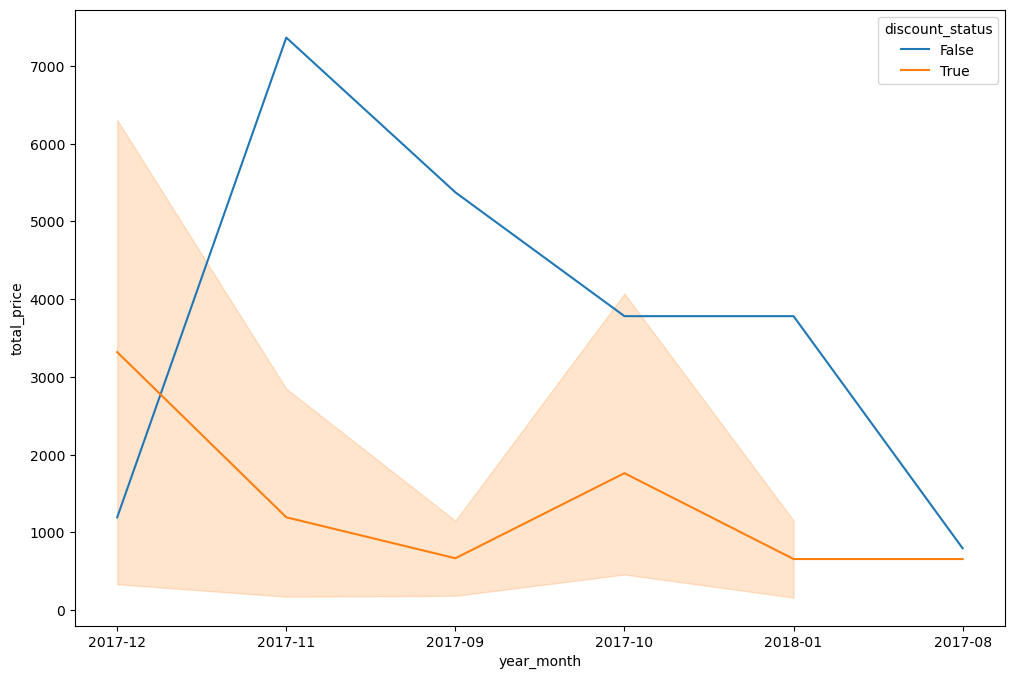

In [46]:
plt.subplots(figsize=(12, 8))
sns.lineplot(x= 'year_month', y = 'total_price', data=products_top_sku, hue='discount_status')

In [47]:
products_false_top_10 = products_top[products_top.discount_status == False].head(10)

In [48]:
products_true_top_10 =products_top[products_top.discount_status == True].head(10)

In [49]:
products_top_months = pd.concat([products_false_top_10, products_true_top_10])